# Premier League Match Stats EDA 2014 to 2024

The Match Stats dataset contains every match from 2014 to 2024.

1. Date - date of match in Y-m-d format
2. Season - season the match took place in "start_year/end_year" format. PL seasons run from August to May, so matches taking place from January to May are placed in the previous season.
3. Home Team - Name of the home team
4. Away Team - Name of the away team
5. Home Goals - Goals scored by home team
6. Away Goals - Goals scored by away team
7. Result - H for home win, D for draw, A for away win

In [33]:
# Import relevant Python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load dataset into Data Frame

match_stats_df = pd.read_csv('../csvs/pl_match_stats_2014_2024_cleaned.csv')
match_stats_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [35]:
# Examine integrity of data in the Data Frame.
# There are no nulls/missing values.
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        3800 non-null   object
 1   Season      3800 non-null   object
 2   Home Team   3800 non-null   object
 3   Away Team   3800 non-null   object
 4   Home Goals  3800 non-null   int64 
 5   Away Goals  3800 non-null   int64 
 6   Result      3800 non-null   object
dtypes: int64(2), object(5)
memory usage: 207.9+ KB


### Match Stats EDA

1. Analyze trend for total goals across seasons
2. Analyze home and away goals across seasons
3. Create PL table df, which will contain placement, points, goals for, goals against, and goal differential for each season

Text(0, 0.5, 'Total Goals Scored')

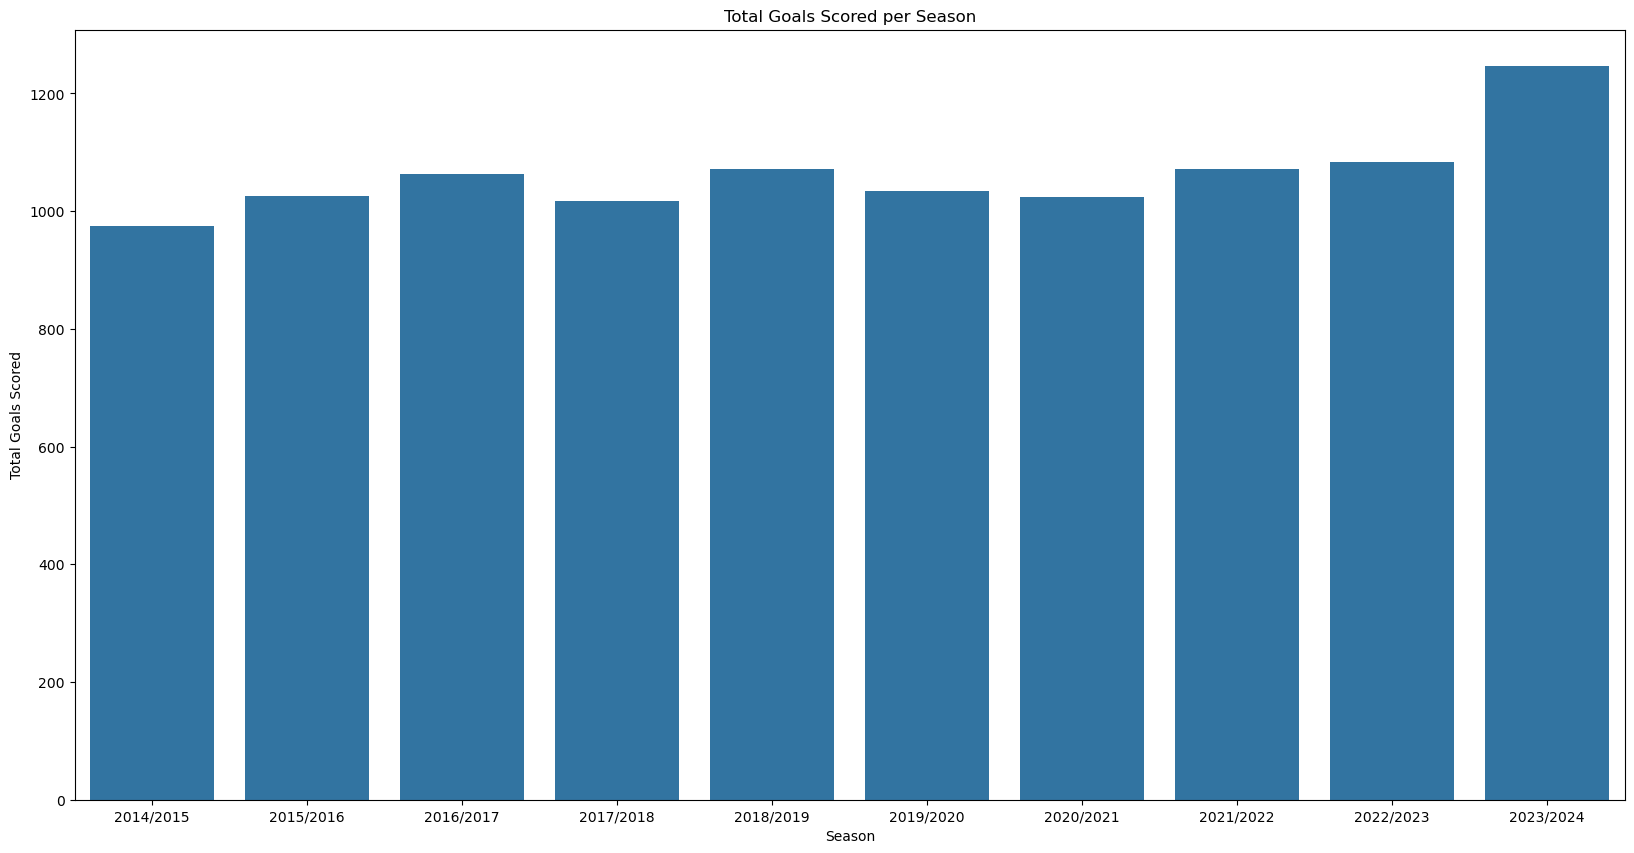

In [36]:
# Examine the trend for total goals by season
# As shown in the column graph, total goals scored per season has been trending slightly upward from 2014 to 2024, with a large jump in goals from 2022/2023 to 2023/2024
match_stats_df['Total Goals'] = match_stats_df['Home Goals'] + match_stats_df['Away Goals']

plt.figure(figsize = (20, 10))
sns.barplot(data = match_stats_df.groupby('Season', as_index = False)['Total Goals'].sum(), x = 'Season', y = 'Total Goals')
plt.title('Total Goals Scored per Season')
plt.ylabel('Total Goals Scored')

In [37]:
# Find the team who had the best defense at home (fewest goals for away team when the team in question is the home team)
# As we can see, there is a 5 way tie with Chelsea (14/15), Liverpool (21/22), Man U (15/16), Man U (17/18), and Tottenham (16/17) each receiving 9 goals against their team at home for their respective seasons.

agg_away_goals = match_stats_df.groupby(['Home Team', 'Season'], as_index = False)['Away Goals'].sum()
agg_away_goals.rename(columns = {'Away Goals' : 'Goals Conceded at Home'}, inplace = True)
agg_away_goals[agg_away_goals['Goals Conceded at Home'] == agg_away_goals['Goals Conceded at Home'].min()].head(10)

,Home Team,Season,Goals Conceded at Home
43,Chelsea FC,2014/2015,9
100,Liverpool FC,2021/2022,9
115,Manchester United FC,2015/2016,9
117,Manchester United FC,2017/2018,9
165,Tottenham Hotspur FC,2016/2017,9


In [38]:
# Similarly, find the team who had the best offense at home
# Manchester City had the best offense of the 10-year period with 61 goals scored at home in season 2017/2018

agg_home_goals = match_stats_df.groupby(['Home Team', 'Season'], as_index = False)['Home Goals'].sum()
agg_home_goals.rename(columns = {'Home Goals' : 'Goals Scored at Home'}, inplace = True)
agg_home_goals[agg_home_goals['Goals Scored at Home'] == agg_home_goals['Goals Scored at Home'].max()].head(10)

,Home Team,Season,Goals Scored at Home
107,Manchester City FC,2017/2018,61


In [39]:
# Similarly, find the team and season which had the best defense away
# Chelsea (21/22) and Manchester City (18/19 and 21/22) had the best defense away with each of them only getting scored on 11 times in away matches for their respective seasons.

agg_home_goals1 = match_stats_df.groupby(['Away Team', 'Season'], as_index = False)['Home Goals'].sum()
agg_home_goals1.rename(columns = {'Home Goals' : 'Goals Conceded Away'}, inplace = True)
agg_home_goals1[agg_home_goals1['Goals Conceded Away'] == agg_home_goals1['Goals Conceded Away'].min()].head(10)

,Away Team,Season,Goals Conceded Away
50,Chelsea FC,2021/2022,11
108,Manchester City FC,2018/2019,11
111,Manchester City FC,2021/2022,11


In [40]:
# Similarly, find the team and season which had the best offense away
# Liverpool (21/22) and Manchester City (17/18, 19/20, and 23/24) had the best offense away from home with 45 goals scored in their respective seasons.

agg_away_goals1 = match_stats_df.groupby(['Away Team', 'Season'], as_index = False)['Away Goals'].sum()
agg_away_goals1.rename(columns = {'Away Goals' : 'Goals Scored Away'}, inplace = True)
agg_away_goals1[agg_away_goals1['Goals Scored Away'] == agg_away_goals1['Goals Scored Away'].max()].head(10)

,Away Team,Season,Goals Scored Away
100,Liverpool FC,2021/2022,45
107,Manchester City FC,2017/2018,45
109,Manchester City FC,2019/2020,45
113,Manchester City FC,2023/2024,45


In [41]:
# Best offense for home and away in each season
# As we can see from the data, Manchester City FC makes frequent appearances for most goals away and at home

best_offense_by_season = agg_home_goals.loc[agg_home_goals.groupby('Season')['Goals Scored at Home'].idxmax()].reset_index()
best_offense_by_season.sort_values(by = 'Season')
best_offense_by_season.drop('index', axis = 1, inplace = True)

best_offense_by_season_away = agg_away_goals1.loc[agg_away_goals1.groupby('Season')['Goals Scored Away'].idxmax()].reset_index()
best_offense_by_season_away.sort_values(by = 'Season')
best_offense_by_season_away.drop('index', axis = 1, inplace = True)

print("Best Offense at Home for each Season")
print(best_offense_by_season.head(10))

print("---------------------------------------------------------")

print("Best Offense Away for each Season")
print(best_offense_by_season_away.head(10))

Best Offense at Home for each Season
            Home Team     Season  Goals Scored at Home
0  Manchester City FC  2014/2015                    44
1  Manchester City FC  2015/2016                    47
2          Chelsea FC  2016/2017                    55
3  Manchester City FC  2017/2018                    61
4  Manchester City FC  2018/2019                    57
5  Manchester City FC  2019/2020                    57
6  Manchester City FC  2020/2021                    43
7  Manchester City FC  2021/2022                    58
8  Manchester City FC  2022/2023                    60
9  Manchester City FC  2023/2024                    51
---------------------------------------------------------
Best Offense Away for each Season
            Away Team     Season  Goals Scored Away
0  Manchester City FC  2014/2015                 39
1          Arsenal FC  2015/2016                 34
2  Manchester City FC  2016/2017                 43
3  Manchester City FC  2017/2018                 45
4  Man

In [42]:
# Best defense for home and away in each season
# As can be seen from the data, Manchester City also makes frequent appearances for best defense at home and away

best_defense_by_season = agg_away_goals.loc[agg_away_goals.groupby('Season')['Goals Conceded at Home'].idxmin()].reset_index()
best_defense_by_season.sort_values(by = 'Season')
best_defense_by_season.drop('index', axis = 1, inplace = True)

best_defense_by_season_away = agg_home_goals1.loc[agg_home_goals1.groupby('Season')['Goals Conceded Away'].idxmin()].reset_index()
best_defense_by_season_away.sort_values(by = 'Season')
best_defense_by_season_away.drop('index', axis = 1, inplace = True)

print("Best Defense at Home for each Season")
print(best_defense_by_season.head(10))

print("---------------------------------------------------------")

print("Best Defense Away for each Season")
print(best_defense_by_season_away.head(10))

Best Defense at Home for each Season
              Home Team     Season  Goals Conceded at Home
0            Chelsea FC  2014/2015                       9
1  Manchester United FC  2015/2016                       9
2  Tottenham Hotspur FC  2016/2017                       9
3  Manchester United FC  2017/2018                       9
4          Liverpool FC  2018/2019                      10
5    Manchester City FC  2019/2020                      13
6    Manchester City FC  2020/2021                      17
7          Liverpool FC  2021/2022                       9
8  Manchester United FC  2022/2023                      10
9            Arsenal FC  2023/2024                      16
---------------------------------------------------------
Best Defense Away for each Season
            Away Team     Season  Goals Conceded Away
0      Southampton FC  2014/2015                   20
1   Leicester City FC  2015/2016                   18
2          Chelsea FC  2016/2017                   16
3  Man

In [43]:
# Time to create a PL table DF
# PL DF Features
# 1. Team Name - Name of Team
# 2. Season - Season in start_year/end_year format
# 3. W - total wins in the season
# 4. L - total losses in the season
# 5. D - total draws in the season
# 6. GF - Total goals scored in the season
# 7. GF_H and GF_A - goals scored at home and away, respectively
# 8. GA - total goals conceded
# 9. GA_H and GA_A - goals conceded home and away
# 10. GD - goal differential (GH - GA)
# 11. Points - total points gained in a season (3 for win, 1 for draw, and 0 for loss)


pl_table_df = pd.DataFrame(columns = ['Team Name', 'Season', 'W', 'L', 'D', 'GF', 'GF_H', 'GF_A', 'GA', 'GA_H', 'GA_A', 'GD', 'Points'])
match_stats_df.rename(columns = {'Home Team': 'Home_Team', 'Away Team' : 'Away_Team', 'Home Goals' : 'Home_Goals', 'Away Goals' : 'Away_Goals'}, inplace = True)

In [44]:
# Create a dict to store aggregate results per team per season
match_stats_dict = {}

# Initialize dict with 0 values for each team for each season
for team in match_stats_df['Home_Team'].unique():
    match_stats_dict[team] = {}
    for season in match_stats_df['Season'].unique():
        if (team == "Home_Team"):
            pass
        else:
            match_stats_dict[team][str(season)] = {'W': 0, 'L': 0, 'D': 0, 'GF': 0, 'GA': 0, 'GF_H': 0, 'GF_A': 0, 'GA_H': 0, 'GA_A': 0}

# Iterate over each result in match stats to aggregate data for teams per season
for result in match_stats_df.itertuples():
    if (result.Result == "H"):
        match_stats_dict[result.Home_Team][result.Season]['W'] += 1
        match_stats_dict[result.Away_Team][result.Season]['L'] += 1
        match_stats_dict[result.Home_Team][result.Season]['GF'] += result.Home_Goals
        match_stats_dict[result.Home_Team][result.Season]['GA'] += result.Away_Goals
        match_stats_dict[result.Home_Team][result.Season]['GF_H'] += result.Home_Goals
        match_stats_dict[result.Home_Team][result.Season]['GA_H'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GF'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GA'] += result.Home_Goals
        match_stats_dict[result.Away_Team][result.Season]['GF_A'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GA_A'] += result.Home_Goals

    elif (result.Result == "A"):
        match_stats_dict[result.Home_Team][result.Season]['L'] += 1
        match_stats_dict[result.Away_Team][result.Season]['W'] += 1
        match_stats_dict[result.Home_Team][result.Season]['GF'] += result.Home_Goals
        match_stats_dict[result.Home_Team][result.Season]['GA'] += result.Away_Goals
        match_stats_dict[result.Home_Team][result.Season]['GF_H'] += result.Home_Goals
        match_stats_dict[result.Home_Team][result.Season]['GA_H'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GF'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GA'] += result.Home_Goals
        match_stats_dict[result.Away_Team][result.Season]['GF_A'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GA_A'] += result.Home_Goals
    else:
        match_stats_dict[result.Home_Team][result.Season]['D'] += 1
        match_stats_dict[result.Away_Team][result.Season]['D'] += 1
        match_stats_dict[result.Home_Team][result.Season]['GF'] += result.Home_Goals
        match_stats_dict[result.Home_Team][result.Season]['GA'] += result.Away_Goals
        match_stats_dict[result.Home_Team][result.Season]['GF_H'] += result.Home_Goals
        match_stats_dict[result.Home_Team][result.Season]['GA_H'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GF'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GA'] += result.Home_Goals
        match_stats_dict[result.Away_Team][result.Season]['GF_A'] += result.Away_Goals
        match_stats_dict[result.Away_Team][result.Season]['GA_A'] += result.Home_Goals

# Create points and goal differiental data based off of existing aggregate data per team per season, then add rows to the pl_table_df
for key_name, value in match_stats_dict.items():
    for key_season, data in value.items():
        points = (data['W'] * 3) + data['D']
        gd = data['GF'] - data['GA']
        pl_table_df.loc[len(pl_table_df)] = [key_name, key_season, data['W'], data['L'], data['D'], data['GF'], data['GF_H'], data['GF_A'], data['GA'], data['GA_H'], data['GA_A'], gd, points]

# Create a placement for each team in each season based off of indices
for season in pl_table_df['Season'].unique():
    temp_df = pl_table_df[pl_table_df['Season'] == season].sort_values(by = "Points", ascending = False)
    temp_df.reset_index(drop=True, inplace=True)
    for team in temp_df['Team Name'].unique():
        pl_table_df.loc[(pl_table_df['Team Name'] == str(team)) & (pl_table_df['Season'] == season), "Place"] = temp_df[temp_df['Team Name'] == str(team)].index + 1

# Drop data where teams were not in the PL that season
pl_table_df = pl_table_df[pl_table_df["Points"] != 0]
pl_table_df.fillna(0, inplace=True)



In [45]:
pl_table_df['Place'] = pl_table_df['Place'].astype(int)

In [46]:
# Preference placement for teams with better GD when points are tied for multiple teams

pl_table_df = pl_table_df.sort_values(by = ['Season', 'Place'])
past_points = 0
past_placement_index = 0
for placement in pl_table_df.itertuples():
    if placement.Points == past_points:
        if placement.GD > pl_table_df.loc[past_placement_index, 'GD']:
            temp = placement.Place
            pl_table_df.loc[placement.Index, 'Place'] = pl_table_df.loc[past_placement_index, 'Place']
            pl_table_df.loc[past_placement_index, 'Place'] = temp

    past_placement_index = placement.Index
    past_points = placement.Points

In [47]:
# Column highlighting functions for better visibility

def highlight_column_w(column):
    return ['background-color: green' if column.name == 'W' else '' for _ in column]

def highlight_column_l(column):
    return ['background-color: green' if column.name == 'L' else '' for _ in column]

def highlight_column_gf(column):
    return ['background-color: green' if column.name == 'GF' else '' for _ in column]

def highlight_column_ga(column):
    return ['background-color: green' if column.name == 'GA' else '' for _ in column]

def highlight_column_gah(column):
    return ['background-color: green' if column.name == 'GA_H' else '' for _ in column]

In [54]:
# Find team and season with most Ws
# Top 10 most winning seasons for Teams; Man City (17/18) and Liverpool (19/20) had the best winning seasons with 32 wins in 38 matches for both teams.
pl_table_df.loc[pl_table_df.groupby('Team Name')['W'].idxmax()].reset_index().sort_values(by = 'W', ascending = False).head(10).reset_index().drop(['index', 'level_0'], axis = 1).style.apply(highlight_column_w)

,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place
0,Manchester City FC,2017/2018,32,2,4,106,61,45,27,14,13,79,100,1
1,Liverpool FC,2019/2020,32,3,3,85,52,33,33,16,17,52,99,1
2,Chelsea FC,2016/2017,30,5,3,85,55,30,33,17,16,52,93,1
3,Arsenal FC,2023/2024,28,5,5,91,48,43,29,16,13,62,89,2
4,Tottenham Hotspur FC,2016/2017,26,4,8,86,47,39,26,9,17,60,86,2
5,Manchester United FC,2017/2018,25,7,6,68,38,30,28,9,19,40,81,2
6,Leicester City FC,2015/2016,23,3,12,68,35,33,36,18,18,32,81,1
7,Aston Villa FC,2023/2024,20,10,8,76,48,28,61,28,33,15,68,4
8,Newcastle United FC,2022/2023,19,5,14,68,36,32,33,14,19,35,71,4
9,West Ham United FC,2020/2021,19,11,8,62,32,30,47,22,25,15,65,6


In [56]:
# Find team and season with fewest Ls
# Top 10 least losing seasons for Teams
# Liverpool had the fewest losses in season 18/19
pl_table_df.loc[pl_table_df.groupby('Team Name')['L'].idxmin()].reset_index().sort_values(by = 'L', ascending = True).head(10).reset_index().drop(['index', 'level_0'], axis = 1).style.apply(highlight_column_l)

,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place
0,Liverpool FC,2018/2019,30,1,7,89,55,34,22,10,12,67,97,2
1,Manchester City FC,2017/2018,32,2,4,106,61,45,27,14,13,79,100,1
2,Leicester City FC,2015/2016,23,3,12,68,35,33,36,18,18,32,81,1
3,Chelsea FC,2014/2015,26,3,9,73,36,37,32,9,23,41,87,1
4,Tottenham Hotspur FC,2016/2017,26,4,8,86,47,39,26,9,17,60,86,2
5,Newcastle United FC,2022/2023,19,5,14,68,36,32,33,14,19,35,71,4
6,Manchester United FC,2016/2017,18,5,15,54,26,28,29,12,17,25,69,6
7,Arsenal FC,2023/2024,28,5,5,91,48,43,29,16,13,62,89,2
8,West Ham United FC,2015/2016,16,8,14,65,34,31,51,26,25,14,62,7
9,Brentford FC,2022/2023,15,9,14,58,35,23,46,18,28,12,59,9


In [ ]:
# Find team and season with most goals scored
# Top 10 highest goal scoring seasons
# Man City had the highest scoring season with 106 Goals in 2017/2018
pl_table_df.loc[pl_table_df.groupby('Team Name')['GF'].idxmax()].reset_index().sort_values(by = 'GF', ascending = False).head(10).reset_index().drop(['index', 'level_0'], axis = 1).style.apply(highlight_column_gf)

,level_0,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place
0,17,Manchester City FC,2017/2018,32,2,4,106,61,45,27,14,13,79,100,1
1,15,Liverpool FC,2021/2022,28,2,8,94,49,45,26,9,17,68,92,2
2,1,Arsenal FC,2023/2024,28,5,5,91,48,43,29,16,13,62,89,2
3,29,Tottenham Hotspur FC,2016/2017,26,4,8,86,47,39,26,9,17,60,86,2
4,20,Newcastle United FC,2023/2024,18,14,6,85,49,36,62,22,40,23,60,7
5,7,Chelsea FC,2016/2017,30,5,3,85,55,30,33,17,16,52,93,1
6,2,Aston Villa FC,2023/2024,20,10,8,76,48,28,61,28,33,15,68,4
7,18,Manchester United FC,2020/2021,21,6,11,73,38,35,44,28,16,29,74,2
8,4,Brighton & Hove Albion FC,2022/2023,18,12,8,72,37,35,53,21,32,19,62,6
9,14,Leicester City FC,2015/2016,23,3,12,68,35,33,36,18,18,32,81,1


In [ ]:
# Find team and season with fewest goals scored against
# Top 10 least goals scored against seasons
# Liverpool had the season with the fewest goals scored against them in 2018/2019, wherein only 22 goals were scored against them
pl_table_df.loc[pl_table_df.groupby('Team Name')['GA'].idxmin()].reset_index().sort_values(by = 'GA', ascending = True).head(10).reset_index().drop(['index', 'level_0'], axis = 1).style.apply(highlight_column_ga)

,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place
0,Liverpool FC,2018/2019,30,1,7,89,55,34,22,10,12,67,97,2
1,Manchester City FC,2018/2019,32,4,2,95,57,38,23,12,11,72,98,1
2,Tottenham Hotspur FC,2016/2017,26,4,8,86,47,39,26,9,17,60,86,2
3,Manchester United FC,2017/2018,25,7,6,68,38,30,28,9,19,40,81,2
4,Arsenal FC,2023/2024,28,5,5,91,48,43,29,16,13,62,89,2
5,Chelsea FC,2014/2015,26,3,9,73,36,37,32,9,23,41,87,1
6,Newcastle United FC,2022/2023,19,5,14,68,36,32,33,14,19,35,71,4
7,Southampton FC,2014/2015,18,14,6,54,37,17,33,13,20,21,60,7
8,Leicester City FC,2015/2016,23,3,12,68,35,33,36,18,18,32,81,1
9,Burnley FC,2017/2018,14,12,12,36,16,20,39,17,22,-3,54,7


In [65]:
# "This is our House" team
# Team with fewest goals conceded at home
# Chelsea (14/15), Liverpool (21/22), Spurs (16/17), and Man U (15/16) each conceded the fewest goals at home in their respective seasons

pl_table_df.loc[pl_table_df.groupby('Team Name')['GA_H'].idxmin()].reset_index().sort_values(by = 'GA_H', ascending = True).head(10).reset_index().drop(['index', 'level_0'], axis = 1).style.apply(highlight_column_gah)


,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place
0,Chelsea FC,2014/2015,26,3,9,73,36,37,32,9,23,41,87,1
1,Liverpool FC,2021/2022,28,2,8,94,49,45,26,9,17,68,92,2
2,Tottenham Hotspur FC,2016/2017,26,4,8,86,47,39,26,9,17,60,86,2
3,Manchester United FC,2015/2016,19,10,9,49,27,22,35,9,26,14,66,5
4,Arsenal FC,2015/2016,20,7,11,65,31,34,36,11,25,29,71,2
5,Manchester City FC,2018/2019,32,4,2,95,57,38,23,12,11,72,98,1
6,Southampton FC,2014/2015,18,14,6,54,37,17,33,13,20,21,60,7
7,Newcastle United FC,2022/2023,19,5,14,68,36,32,33,14,19,35,71,4
8,Sheffield United FC,2019/2020,14,12,12,39,24,15,39,15,24,0,54,9
9,Everton FC,2016/2017,17,11,10,62,42,20,44,16,28,18,61,7


In [66]:
# Teams with most frequent CL qualifying success
# For simplicity's sake, we will grab just count the number of top 4 placements each team has had over the course of all seasons
# Manchester City had the most Top 4 Finishes, finishing in one of the Top 4 Places every season in our dataset!

pl_table_df[pl_table_df['Place'] <= 4].groupby('Team Name', as_index = False)['Place'].count().rename(columns = {'Place' : 'Top 4 Finishes'}).sort_values(by = 'Top 4 Finishes', ascending = False).head(10).reset_index().drop(columns = ['index'])



,Team Name,Top 4 Finishes
0,Manchester City FC,10
1,Liverpool FC,7
2,Chelsea FC,6
3,Tottenham Hotspur FC,5
4,Manchester United FC,5
5,Arsenal FC,4
6,Aston Villa FC,1
7,Leicester City FC,1
8,Newcastle United FC,1


In [67]:
# Teams with most PL Titles
# Manchester City has the most PL Titles from 2014 to 2024 with 6 titles won!
pl_table_df[pl_table_df['Place'] == 1].groupby('Team Name', as_index = False)['Place'].count().rename(columns = {'Place' : 'PL Titles'}).sort_values(by = 'PL Titles', ascending = False).head(10).reset_index().drop(columns = ['index'])

,Team Name,PL Titles
0,Manchester City FC,6
1,Chelsea FC,2
2,Leicester City FC,1
3,Liverpool FC,1


In [69]:
# Now that we've explored the data frame, we'll export it to a .csv

pl_table_df.to_csv('../csvs/pl_table_2014_2024.csv')

In [70]:
# Convert match stats date to Y-m-d format
match_stats_df['Date'] = pd.to_datetime(match_stats_df['Date'], format = "%Y-%m-%d")

In [71]:
# Create new dataframe for a pl_table_halves dataset that contains data separated by part of the season (first half is until the New Year, then second half lasts from New Year until season end)
pl_table_halves_df = pd.DataFrame(columns = ['Team Name', 'Season', 'Half', 'W', 'L', 'D', 'GF', 'GF_H', 'GF_A', 'GA', 'GA_H', 'GA_A', 'GD', 'Points'])

In [72]:
# Create PL table with season halves

match_stats_halves = {}

for team in match_stats_df['Home_Team'].unique():
    match_stats_halves[team] = {}
    for season in match_stats_df['Season'].unique():
        match_stats_halves[team][season] = {}
        if (team == "Home_Team"):
            pass
        else:
            match_stats_halves[team][str(season)]['First Half'] = {'W': 0, 'L': 0, 'D': 0, 'GF': 0, 'GA': 0, 'GF_H': 0, 'GF_A': 0, 'GA_H': 0, 'GA_A': 0}
            match_stats_halves[team][str(season)]['Second Half'] = {'W': 0, 'L': 0, 'D': 0, 'GF': 0, 'GA': 0, 'GF_H': 0, 'GF_A': 0, 'GA_H': 0, 'GA_A': 0}

# Iterate over each result in match stats to aggregate data for teams per season
for result in match_stats_df.itertuples():
    part_of_season = 'Second Half'
    if result.Date.month >= 8:
        part_of_season = 'First Half'

    if (result.Result == "H"):
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['W'] += 1
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['L'] += 1
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GF'] += result.Home_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GA'] += result.Away_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GF_H'] += result.Home_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GA_H'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GF'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GA'] += result.Home_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GF_A'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GA_A'] += result.Home_Goals

    elif (result.Result == "A"):
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['L'] += 1
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['W'] += 1
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GF'] += result.Home_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GA'] += result.Away_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GF_H'] += result.Home_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GA_H'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GF'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GA'] += result.Home_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GF_A'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GA_A'] += result.Home_Goals
    else:
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['D'] += 1
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['D'] += 1
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GF'] += result.Home_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GA'] += result.Away_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GF_H'] += result.Home_Goals
        match_stats_halves[result.Home_Team][result.Season][part_of_season]['GA_H'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GF'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GA'] += result.Home_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GF_A'] += result.Away_Goals
        match_stats_halves[result.Away_Team][result.Season][part_of_season]['GA_A'] += result.Home_Goals


for key_name, value in match_stats_halves.items():
    for key_season, datas in value.items():
        for key_part, data in datas.items():
            points = (data['W'] * 3) + data['D']
            gd = data['GF'] - data['GA']
            pl_table_halves_df.loc[len(pl_table_halves_df)] = [key_name, key_season, key_part, data['W'], data['L'], data['D'], data['GF'], data['GF_H'], data['GF_A'], data['GA'], data['GA_H'], data['GA_A'], gd, points]

for season in pl_table_halves_df['Season'].unique():
    for part in pl_table_halves_df['Half']:
        temp_df = pl_table_halves_df[(pl_table_halves_df['Season'] == season) & (pl_table_halves_df['Half'] == part)].sort_values(by = "Points", ascending = False)
        temp_df.reset_index(drop=True, inplace=True)
        for team in temp_df['Team Name'].unique():
            pl_table_halves_df.loc[(pl_table_halves_df['Team Name'] == str(team)) & (pl_table_halves_df['Season'] == season) & (pl_table_halves_df['Half'] == part), "Place"] = temp_df[temp_df['Team Name'] == str(team)].index + 1


In [73]:
# Take out records with no points in a season

pl_table_halves_df = pl_table_halves_df[pl_table_halves_df['Points'] != 0]

In [74]:
# Verify that columns and data looks correct

pl_table_halves_df[pl_table_halves_df['Season'] == "2014/2015"].sort_values(by = 'Place', ascending = True)

,Team Name,Season,Half,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place
121,Arsenal FC,2014/2015,Second Half,13,3,3,37,23,14,13,4,9,24,42,1.0
220,Chelsea FC,2014/2015,First Half,14,1,4,41,22,19,14,3,11,27,46,1.0
221,Chelsea FC,2014/2015,Second Half,12,2,5,32,14,18,18,6,12,14,41,2.0
380,Manchester City FC,2014/2015,First Half,13,2,4,41,17,24,17,7,10,24,43,2.0
381,Manchester City FC,2014/2015,Second Half,11,5,3,42,27,15,21,7,14,21,36,3.0
0,Manchester United FC,2014/2015,First Half,10,3,6,33,22,11,19,7,12,14,36,3.0
1,Manchester United FC,2014/2015,Second Half,10,5,4,29,19,10,18,8,10,11,34,4.0
280,Southampton FC,2014/2015,First Half,10,6,3,32,22,10,15,7,8,17,33,4.0
141,Liverpool FC,2014/2015,Second Half,10,5,4,26,17,9,23,11,12,3,34,5.0
120,Arsenal FC,2014/2015,First Half,9,4,6,34,18,16,23,10,13,11,33,5.0
